# Using Split Lyapunov Surface
### to calculate orbits near Sun-Earth L1

### Initialization

In [1]:
import orbipy as op
import numpy as np
import pandas as pd
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt

In [2]:
model = op.crtbp3_model()
stmmodel = op.crtbp3_model(stm=True)
plotter = op.plotter.from_model(model, length_units='Mm')
scale = plotter.scaler
pmodel = op.crtbp3_model() # precision model
pmodel.integrator.set_params(max_step=scale(1, 'd-nd'))

In [3]:
# initial position and step size
x0 = model.L1 - 100000/model.R
z0 = 500000/model.R
dx = -1000/model.R

In [4]:
# left and right planes to calculate first 4 orbits
left = op.eventX(model.L1-1.5e6/model.R)
right = op.eventX(model.L1+1.5e6/model.R)

corrp = op.border_correction(model, op.y_direction(), left, right)

### First 4 orbits using border correction with planes

In [5]:
# calculate first 4 orbits
states = []
jacobis = []

for x in [x0+dx, x0+2*dx, x0+3*dx, x0+4*dx]:
    s0 = model.get_zero_state()
    s0[0] = x
    s0[2] = z0
    dv = corrp.calc_dv(0., s0)
    s0 += dv
    states.append(s0)
    jacobis.append(model.jacobi(s0))

### Calculate next set of orbits using split lyapunov surface
#### Every next run adds new orbits states to states list

In [6]:
# calculate next bunch of orbits using cubic extrapolation for jacobi constant initial guess
# eventSPL needs this initial guess
i = 0
while i < 500:
    jint = interp1d([states[j][0] for j in range(-4, 0)],
                    [jacobis[j] for j in range(-4, 0)], 
                    kind='cubic',
                    fill_value='extrapolate')
    x = states[-1][0] + dx
    jc = jint(x)
    evL = op.eventSPL(model, jc, accurate=False)
    evR = op.eventSPL(model, jc, left=False, accurate=False)
    corr = op.border_correction(model, op.y_direction(), evL, evR, maxt=1000., dv0=0.01)
    s0 = model.get_zero_state()
    s0[0] = x
    s0[2] = z0
    dv = corrp.calc_dv(0., s0)
    s0 += dv
    states.append(s0)
    jacobis.append(model.jacobi(s0))
    print('%03d'%i, '%10.2f'%((x - model.L1)*model.R), dv[4], jc)
    i += 1
print('Done')

000 -105000.00 0.0075902936866655306 3.0007997021565496
001 -106000.00 0.007645009895272139 3.00079899489724
002 -107000.00 0.007699831734287485 3.000798280629286
003 -108000.00 0.00775475960644421 3.000797559311204
004 -109000.00 0.007809793912502626 3.000796830901271
005 -110000.00 0.007864935051103927 3.0007960953575794
006 -111000.00 0.007920183418605049 3.000795352637995
007 -112000.00 0.007975539408931311 3.000794602700201
008 -113000.00 0.00803100341338769 3.000793845501648
009 -114000.00 0.00808657582051374 3.0007930809996206
010 -115000.00 0.008142257015704002 3.000792309151196
011 -116000.00 0.008198047381742481 3.0007915299132657
012 -117000.00 0.008253947296645733 3.000790743242497
013 -118000.00 0.008309957137702282 3.000789949095528
014 -119000.00 0.008366077275949168 3.000789147428452
015 -120000.00 0.008422308079293188 3.0007883381977427
016 -121000.00 0.008478649911497835 3.000787521359183
017 -122000.00 0.008535103131928637 3.0007866968687034
018 -123000.00 0.00859166

160 -265000.00 0.017845107009640145 3.000542368923123
161 -266000.00 0.017673430979875962 3.0005473731742063
162 -267000.00 0.017977719723700585 3.0006210269254723
163 -268000.00 0.017802646608691124 3.0005008719399804
164 -269000.00 0.01786732374233137 3.000626296513867
165 -270000.00 0.017931249547268012 3.0005302122433917
166 -271000.00 0.017995309877923388 3.0005710257141325
167 -272000.00 0.018059203527679285 3.0005602789167978
168 -273000.00 0.01837117362746196 3.000558247519403
169 -274000.00 0.018186473293682236 3.000519913005176
170 -275000.00 0.018249840791237745 3.0006084220855067
171 -276000.00 0.018313024377382355 3.0005157390114188
172 -277000.00 0.018376019884813292 3.0005589489416846
173 -278000.00 0.01843914730495219 3.000547801136623
174 -279000.00 0.018757317558137473 3.000545664996992
175 -280000.00 0.018820885720938478 3.000505560156263
176 -281000.00 0.018626040042847777 3.000560254409984
177 -282000.00 0.018688034951503684 3.000558983355381
178 -283000.00 0.01874

313 -418000.00 0.024769830876064613 3.0003106759111096
314 -419000.00 0.02479996910846678 3.0003094774437202
315 -420000.00 0.02482996267971814 3.0003082848295555
316 -421000.00 0.024859812932169847 3.000307098027616
317 -422000.00 0.024889521195936556 3.000305916997076
318 -423000.00 0.024919088788922298 3.0003047416972777
319 -424000.00 0.02494851701684117 3.000303572087755
320 -425000.00 0.02497780717325967 3.0003024081281975
321 -426000.00 0.02500696053961429 3.0003012497785035
322 -427000.00 0.025035978385265962 3.0003000969987648
323 -428000.00 0.025064861967536073 3.00029894974926
324 -429000.00 0.025093612531752716 3.000297807990486
325 -430000.00 0.025122231311314892 3.000296671683132
326 -431000.00 0.025150719527710044 3.0002955407881045
327 -432000.00 0.025179078390639285 3.000294415266533
328 -433000.00 0.025207309097995796 3.000293295079738
329 -434000.00 0.025235412835977203 3.0002921801893088
330 -435000.00 0.025263390779141387 3.0002910705570147
331 -436000.00 0.0252912

469 -574000.00 0.02759878309443762 3.000214332509494
470 -575000.00 0.02761019136891027 3.0002140708019795
471 -576000.00 0.027621599770464036 3.000213809398713
472 -577000.00 0.02763300766054994 3.000213547952388
473 -578000.00 0.02764441594554414 3.000213286975536
474 -579000.00 0.027655823566634204 3.0002130258684896
475 -580000.00 0.02766723099843959 3.0002127653452564
476 -581000.00 0.027678638534696712 3.0002125047139394
477 -582000.00 0.02769004572310978 3.000212244350867
478 -583000.00 0.027701452626722745 3.0002119842900536
479 -584000.00 0.027712859585456773 3.0002117243284125
480 -585000.00 0.027724266524459914 3.0002114645276574
481 -586000.00 0.027735673301904823 3.000211204978168
482 -587000.00 0.027747079916332046 3.000210945614511
483 -588000.00 0.027758485897524117 3.000210686425044
484 -589000.00 0.02776989184682188 3.0002104275407966
485 -590000.00 0.027781297863941647 3.000210168663926
486 -591000.00 0.027792703537807113 3.0002099100765807
487 -592000.00 0.027804108

In [7]:
len(states)

504

### Make station-keeping and plot orbit

In [8]:
# initialize station-keeping algorithm for last state
corr_unst = op.border_correction(model, op.unstable_direction_stm(stmmodel), evL, evR, maxt=1000.)
sk = op.simple_station_keeping(model, corr, corr_unst, rev=np.pi/2)

Simple station-keeping: 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 


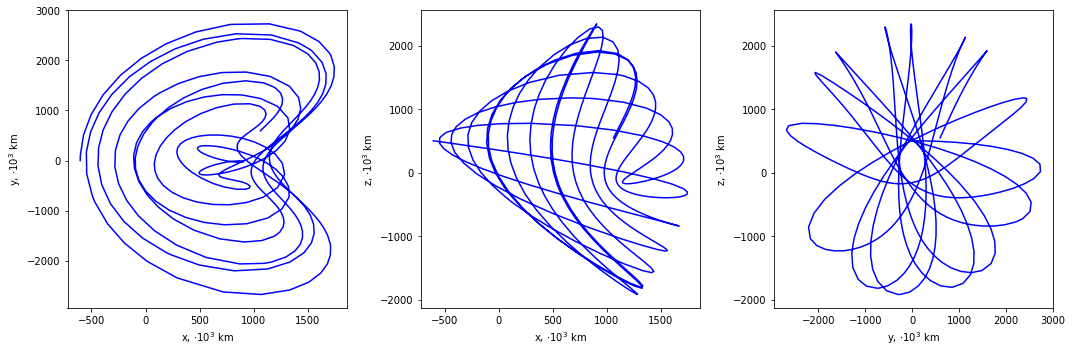

In [9]:
# propagate last state for 20 corrections
df = sk.prop(0.0, states[-1], 20)
plotter.plot_proj(df, centers={'x':model.L1});

In [10]:
# check maximum delta-v (should be less than integration tolerance, i.e. 1e-12)
max_dv = np.max(np.linalg.norm(sk.dvout[:,1:], axis=1)[1:])
print('max_dv:', max_dv, 'nd/nd')
print('max_dv:', scale(max_dv,'nd/nd-cm/s'), 'cm/s')

max_dv: 2.2760009765625004e-13 nd/nd
max_dv: 6.783866596592967e-07 cm/s


### Forbidden zone and split point

In [11]:
def calc_v(xy, J):
    return 2*model.omega(np.array([xy[0], xy[1], 0.0])) - J

In [12]:
# calculate horizontal lyapunov orbit, forbidden zone, split point
xy = []
for th in evL.theta:
    xy.append(evL.get_xy(th))
    
spl_th = evL.split_theta
spl_xy = evL.get_xy(spl_th)
xy = np.array(xy)

vel2 = np.array([calc_v(xyi, jacobis[-1]) for xyi in xy])
mask = (vel2 <= 0)
#np.any(mask)

xy = pd.DataFrame({'x':xy[:,0], 'y':xy[:,1]})
spl_xy = pd.DataFrame({'x':[spl_xy[0]], 'y':[spl_xy[1]]})

In [13]:
# plot all in x-y projection
ax = plotter.plot_proj(xy, fsize=(15,15), projections=('x-y',), centers={'x':model.mu1});
plotter.plot_proj(xy[mask], ax=ax, projections=('x-y',), centers={'x':model.mu1}, colors='r', linewidth=10);
plotter.plot_proj(spl_xy, ax=ax, projections=('x-y',), centers={'x':model.mu1}, marker='x');
plotter.plot_proj(df, ax=ax, projections=('x-y',), centers={'x':model.mu1}, colors='g');
plotter.plot_proj(plottables=[plotter.L1, plotter.m], projections=('x-y',), ax=ax, 
                  centers={'x':model.mu1}, marker='o', colors='k',
                 grid=True);
#ax.set_xlim(-100, 100)